In [3]:
import numpy as np
from sklearn.datasets import fetch_mldata
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve

In [4]:
mnist = fetch_mldata('MNIST original')

In [5]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [6]:
#splitting the data
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [7]:
#shuffling the data 
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [8]:
# Importing the KNN
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=10)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=10, p=2,
           weights='distance')

In [9]:
# Using Cross-Validation
cross_val_score(knn_clf, X_train, y_train, cv=3, scoring="accuracy")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(knn_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([ 0.9360128 ,  0.94034702,  0.9426914 ])

In [10]:
y_train_pred = cross_val_predict(knn_clf, X_train_scaled, y_train, cv=3)
y_train_pred

array([ 7.,  7.,  7., ...,  4.,  6.,  9.])

In [11]:
# Confusion Matrix
confusion_matrix = confusion_matrix(y_train, y_train_pred)
confusion_matrix

array([[5825,    5,   18,    7,    0,   17,   36,    4,    5,    6],
       [   1, 6670,   21,    7,    7,    2,   18,   10,    2,    4],
       [  62,   79, 5487,  101,   32,   13,   59,   68,   40,   17],
       [  10,   24,   61, 5768,    4,   83,    7,   76,   60,   38],
       [   5,   81,   55,   10, 5375,   24,   26,   22,    6,  238],
       [  32,   19,   12,  151,   18, 4973,  103,   16,   35,   62],
       [  62,   16,   21,    4,   10,   52, 5743,    1,    9,    0],
       [  11,   73,   21,   15,   53,    5,    1, 5868,    3,  215],
       [  41,  103,   39,  113,   40,  207,   37,   18, 5176,   77],
       [  23,   13,   22,   55,  106,   15,    0,  205,   14, 5496]])

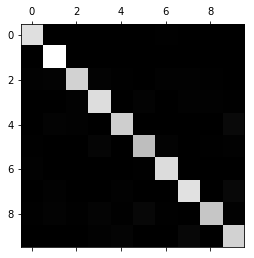

In [12]:
# Plotting the confusion matrix
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)
plt.matshow(confusion_matrix, cmap=plt.cm.gray)
plt.show()

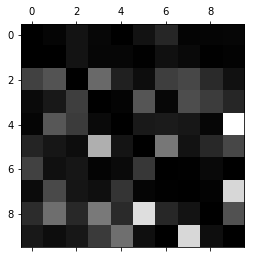

In [13]:
row_sums = confusion_matrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusion_matrix / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()


In [14]:
# Accuracy of the test data
y_knn_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_knn_pred)

0.96840000000000004